In [76]:
import numpy as np
from matplotlib import pyplot as plt
from qbstyles import mpl_style

from sklearn.metrics import r2_score

import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

mpl_style(dark=True)

In [103]:
class MyDataset(Dataset):
    def __init__(self, samples, targets):
        self.samples = samples
        self.targets = targets
    
    def __getitem__(self, index):
        return self.samples[index], self.targets[index]
    
    def __len__(self):
        return len(self.samples)


class Model(nn.Module):
    def __init__(self, input_shape, output_shape):
        super(Model, self).__init__()
        self.linear = nn.Linear(input_shape, output_shape)
    
    def forward(self, X):
        return self.linear(X)
    
    def fit(self, dataloader, optimizer, criterion, epochs=10):
        losses = []
        for _ in range(epochs):
            for X_batch, Y_batch in dataloader:
                Yhat = self.forward(X_batch)
                loss = criterion(Yhat, Y_batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                
                losses.append(loss.item())
        
        return losses
    
    def predict(self, X):
        return self.forward(X).detach()

In [72]:
X = torch.arange(20, dtype=torch.float).reshape(-1, 2)
W = torch.tensor([3, 6], dtype=torch.float)
b = 8
Y = (X @ W + b).reshape(-1, 1)

dataset = MyDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=len(dataset))

tensor(0.0317)


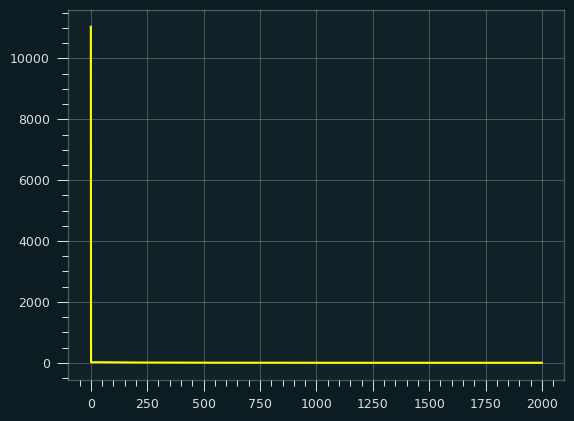

In [104]:
model = Model(2, 1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.002)

losses = model.fit(dataloader, optimizer, criterion, 2000)

print(criterion(model.predict(X), Y))
plt.plot(losses, color="yellow")

In [105]:
accuracy = r2_score(model.predict(X), Y)
round(accuracy, 4) * 100

100.0